# Trabajo Final - David Zapata

## 01 - exploracion

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,NaN,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,NaN,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,NaN,Fiber optic,No,...,No,No,NaN,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6671 non-null   object 
 2   SeniorCitizen     6649 non-null   float64
 3   Partner           6664 non-null   object 
 4   Dependents        6685 non-null   object 
 5   tenure            6665 non-null   float64
 6   PhoneService      6643 non-null   object 
 7   MultipleLines     6663 non-null   object 
 8   InternetService   6670 non-null   object 
 9   OnlineSecurity    6675 non-null   object 
 10  OnlineBackup      6656 non-null   object 
 11  DeviceProtection  6682 non-null   object 
 12  TechSupport       6652 non-null   object 
 13  StreamingTV       6624 non-null   object 
 14  StreamingMovies   6667 non-null   object 
 15  Contract          6601 non-null   object 
 16  PaperlessBilling  66

,Media,Mediana,Desviación estándar,Mínimo,Máximo
SeniorCitizen,0.16,0.0,0.37,0.00,1.00
tenure,32.52,29.0,24.58,0.00,72.00
MonthlyCharges,64.90,70.4,30.02,18.25,118.75



Valores faltantes por columna:


Contract            442
StreamingTV         419
PaperlessBilling    418
PaymentMethod       413
TotalCharges        402
PhoneService        400
SeniorCitizen       394
TechSupport         391
OnlineBackup        387
MonthlyCharges      384
MultipleLines       380
Partner             379
tenure              378
StreamingMovies     376
InternetService     373
gender              372
OnlineSecurity      368
DeviceProtection    361
Dependents          358
dtype: int64

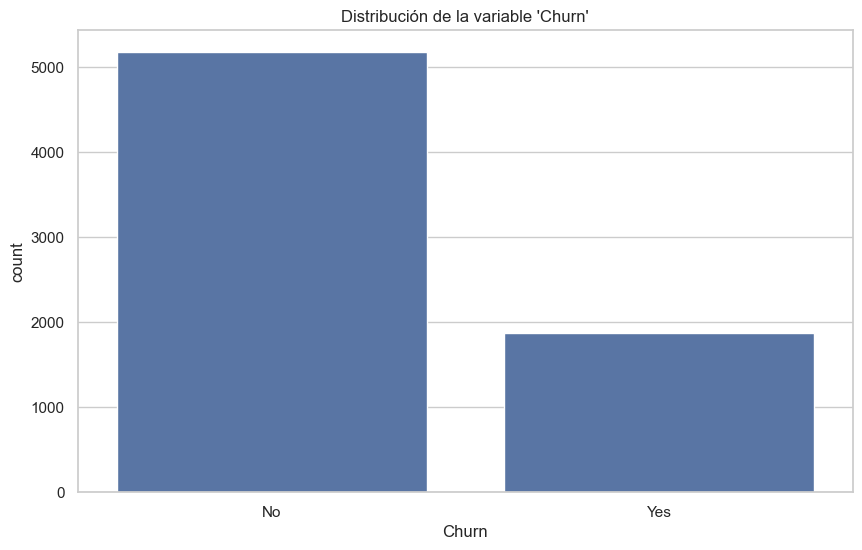

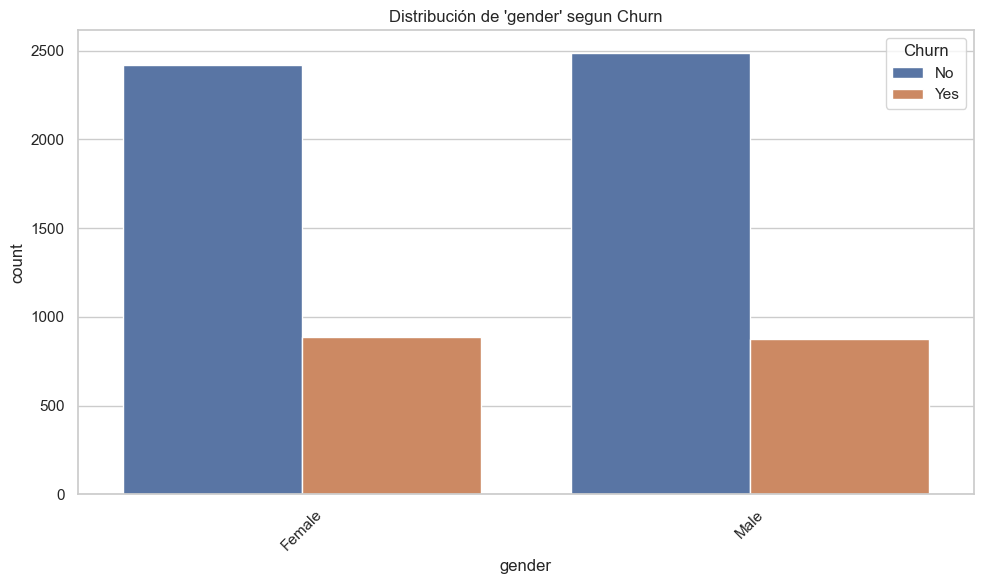

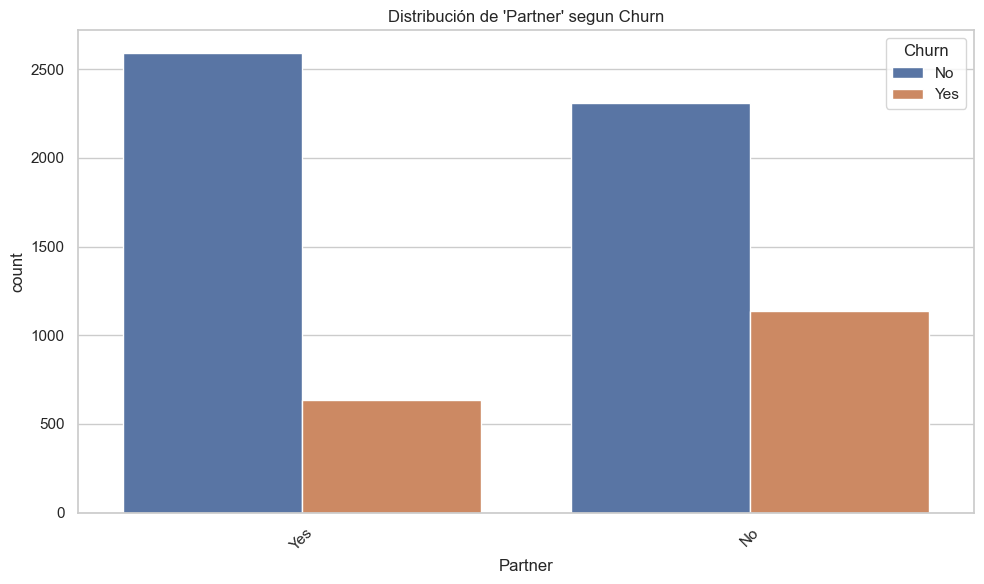

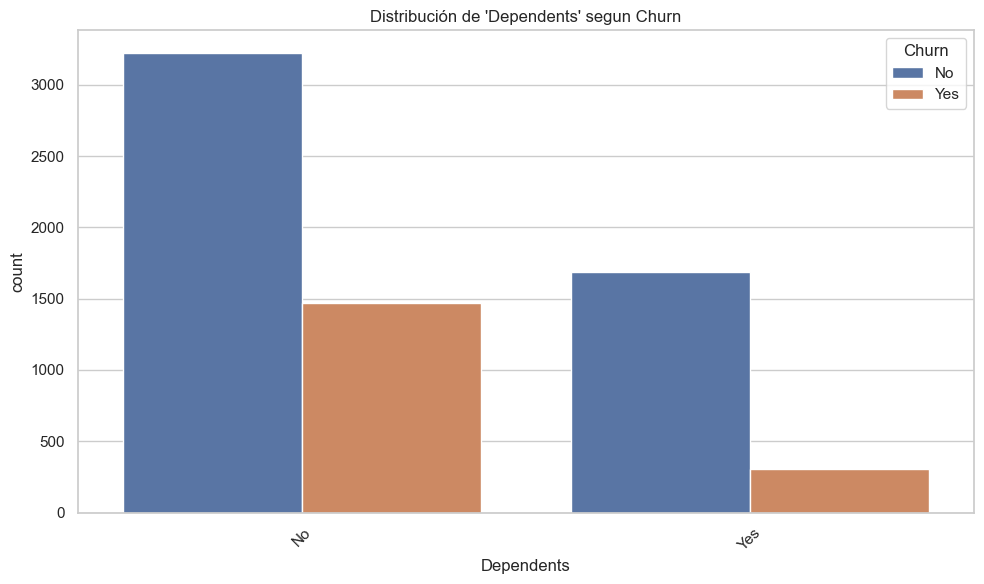

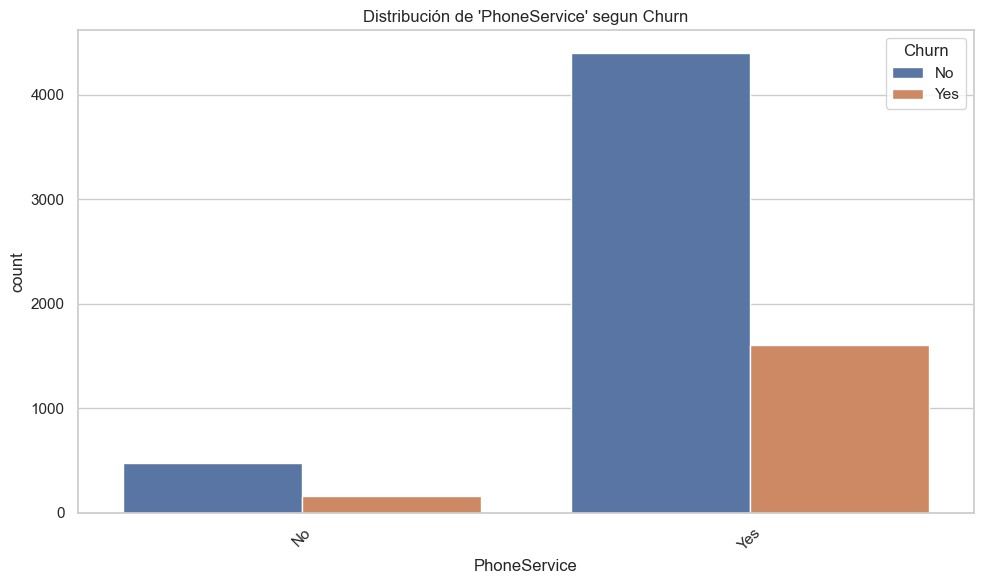

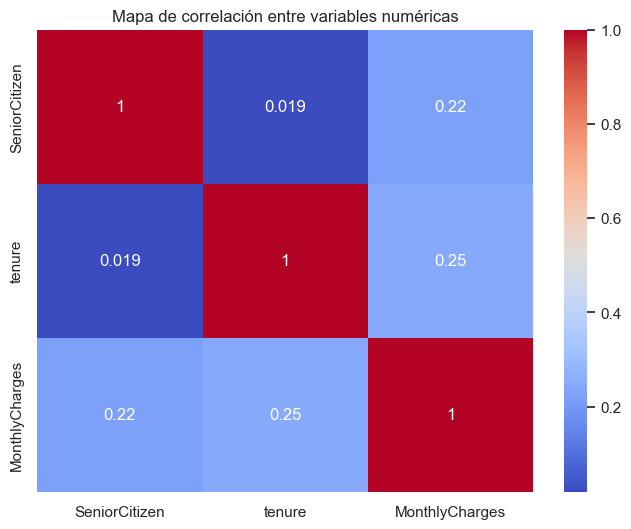

In [23]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df_sim = df.copy()

total_cells = df_sim.shape[0] * df_sim.shape[1]
target_missing = int(total_cells * 0.05)

columns_for_missing = [col for col in df_sim.columns if col not in ['customerID', 'Churn']]

np.random.seed(42)
inserted = 0
while inserted < target_missing:
    rand_row = np.random.randint(0, df_sim.shape[0])
    rand_col = np.random.choice(columns_for_missing)
    if pd.notnull(df_sim.at[rand_row, rand_col]):
        df_sim.at[rand_row, rand_col] = np.nan
        inserted += 1

display(df_sim.head())

print("\nInformación general:")
df_sim.info()

num_df = df_sim.select_dtypes(include=['int64', 'float64'])
desc_stats = pd.DataFrame({
    'Media': num_df.mean(),
    'Mediana': num_df.median(),
    'Desviación estándar': num_df.std(),
    'Mínimo': num_df.min(),
    'Máximo': num_df.max()
})
display(desc_stats.round(2))

print("\nValores faltantes por columna:")
missing = df_sim.isnull().sum()
display(missing[missing > 0].sort_values(ascending=False))

sns.countplot(data=df_sim, x='Churn')
plt.title("Distribución de la variable 'Churn'")
plt.show()

cat_cols = df_sim.select_dtypes(include='object').columns.tolist()
cat_cols.remove('customerID')
cat_cols.remove('Churn')
for col in cat_cols[:4]:
    plt.figure()
    sns.countplot(data=df_sim, x=col, hue='Churn')
    plt.title(f"Distribución de '{col}' segun Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlación entre variables numéricas")
plt.show()